<a href="https://colab.research.google.com/github/sejalraikwa/CODSOFT/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [9]:
df = pd.read_csv('/content/creditcard.csv')

In [10]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [12]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [14]:
df.duplicated().sum()

1081

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
corr_matrix = df.corr()
corr_with_target = corr_matrix['Class'].sort_values(ascending=False)
corr_with_target

,Class
Class,1.000000
V11,0.149067
V4,0.129326
V2,0.084624
V19,0.033631
V8,0.033068
V21,0.026357
V27,0.021892
V20,0.021486
V28,0.009682


In [20]:
print(df.shape)

(283726, 31)


In [19]:
print(df.describe())

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.6898

In [21]:
print(df.shape)

(283726, 31)


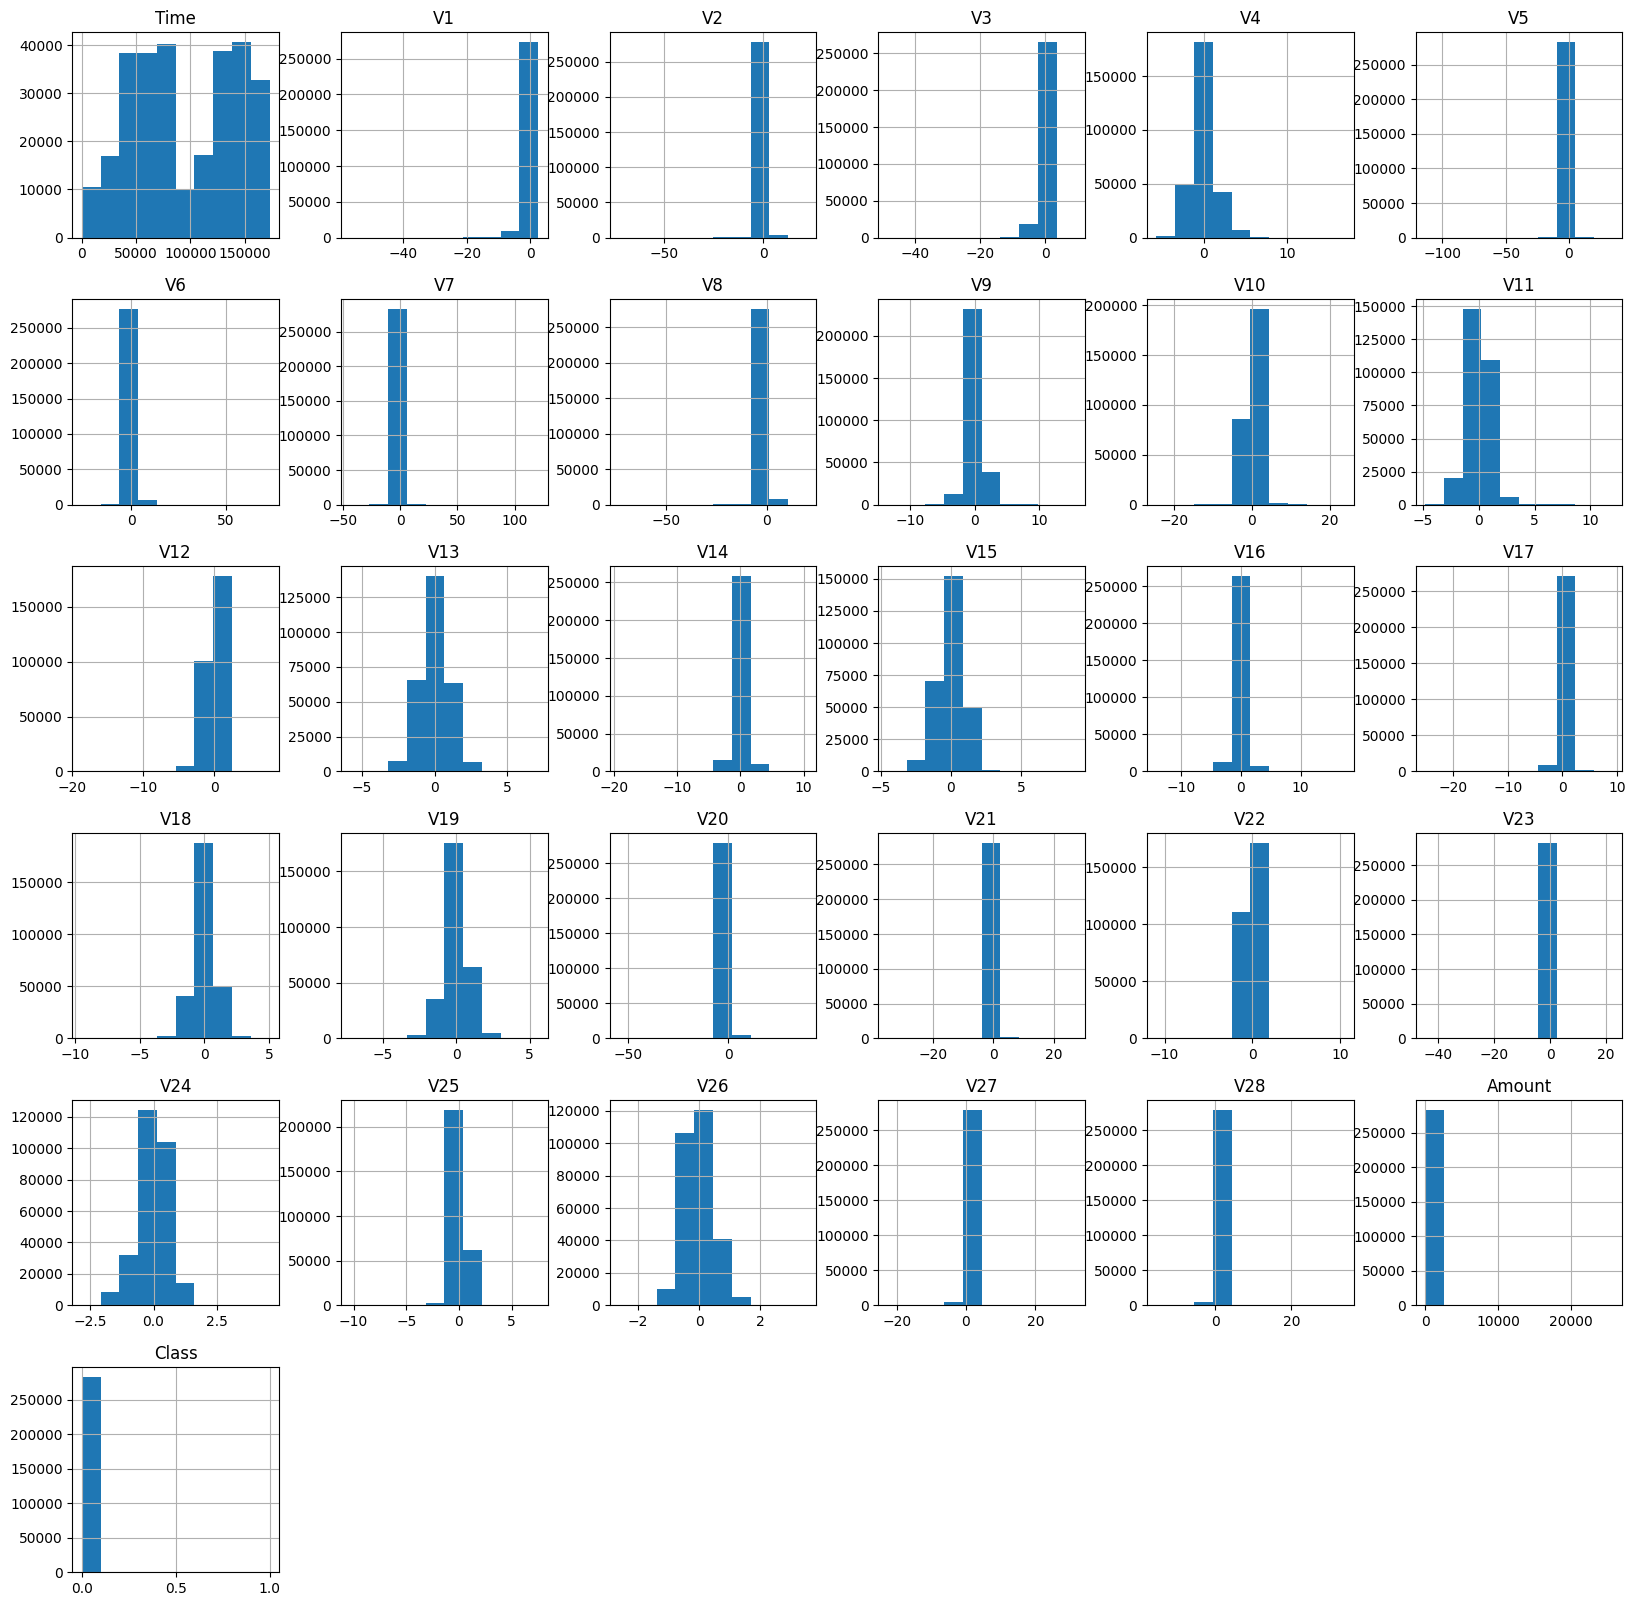

In [22]:
df.hist(figsize = (20, 20))
plt.show()

In [23]:
fraudulent_transactions = df[df['Class'] == 1]
valid_transactions = df[df['Class'] == 0]

outlier_fraction = float(len(fraudulent_transactions)) / float(len(valid_transactions))

print(f"Fraudent transactions: {len(fraudulent_transactions)}")
print(f"Valid transactions: {len(valid_transactions)}")
print(f"Outlier fraction: {outlier_fraction}")
print(f"Outlier %: {round(outlier_fraction*100, 2)}")

Fraudent transactions: 473
Valid transactions: 283253
Outlier fraction: 0.0016698852262818046
Outlier %: 0.17


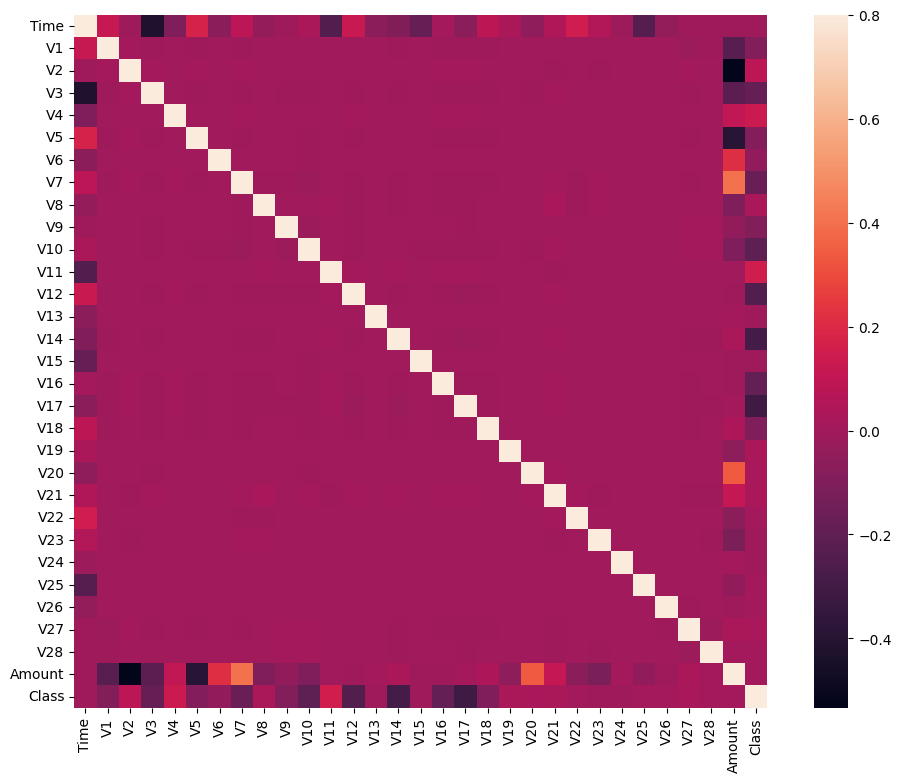

In [24]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [25]:
columns = df.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

target = "Class"

X = df[columns]
y = df[target]

print(X.shape)
print(y.shape)

(283726, 30)
(283726,)


In [26]:
clf = IsolationForest(max_samples = len(X), contamination = outlier_fraction, random_state = 1)
clf.fit(X)
scores_pred = clf.decision_function(X)
y_pred = clf.predict(X)

In [13]:
print(f"Valid transactions predicted by Isolation Forest: {len(y_pred[y_pred == 1])}")
print(f"Fraudulent transactions predicted by Isolation Forest: {len(y_pred[y_pred == -1])}")

Valid transactions predicted by Isolation Forest: 284314
Fraudulent transactions predicted by Isolation Forest: 493


In [14]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [15]:
print(f"Accuracy score: {accuracy_score(y, y_pred)}")

Accuracy score: 0.9977282861727416


In [16]:
n_errors = (y != y_pred).sum()
print(f"Total incorrect predictions: {n_errors}")

Total incorrect predictions: 647


In [17]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

